In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Set plotting style
sns.set(style="whitegrid")

In [2]:
# Load the dataset
cancer = load_breast_cancer()

# Convert to a Pandas DataFrame for easier manipulation
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

print("Dataset loaded successfully!")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Checking target distribution (0 = malignant, 1 = benign)
print("\nTarget Distribution:")
print(df['target'].value_counts())

Dataset loaded successfully!
Dataset shape: (569, 31)

First 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Target Distribution:
target
1    357
0    212
Name: count, dtype: int64


In [3]:
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 'stratify=y' ensures the train and test sets have a similar proportion of target classes

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Use the same scaler fitted on the training data

print("Data split and features standardized.")

Data split and features standardized.


In [4]:
# Create a Logistic Regression model instance
model = LogisticRegression(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Logistic Regression model fitted successfully.")

Logistic Regression model fitted successfully.


Model Performance on Test Set:
  Accuracy: 0.98
  Precision: 0.99
  Recall: 0.99
  ROC-AUC Score: 0.98


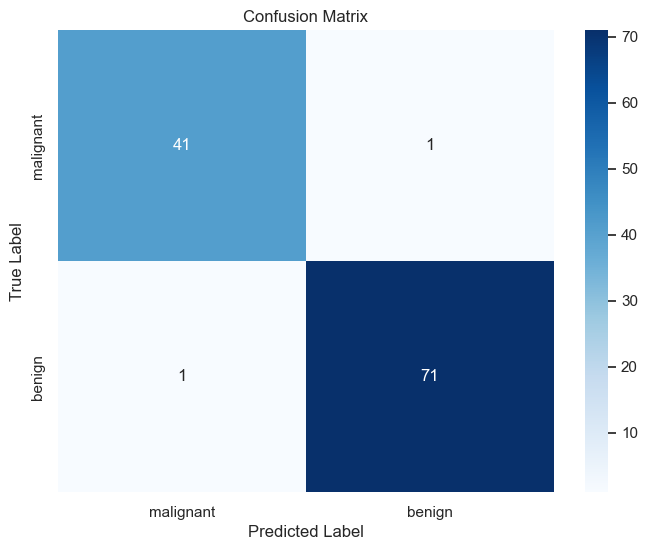

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# --- Evaluate the model's performance ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Model Performance on Test Set:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  Precision: {precision:.2f}")
print(f"  Recall: {recall:.2f}")
print(f"  ROC-AUC Score: {roc_auc:.2f}")

# --- Visualize the Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

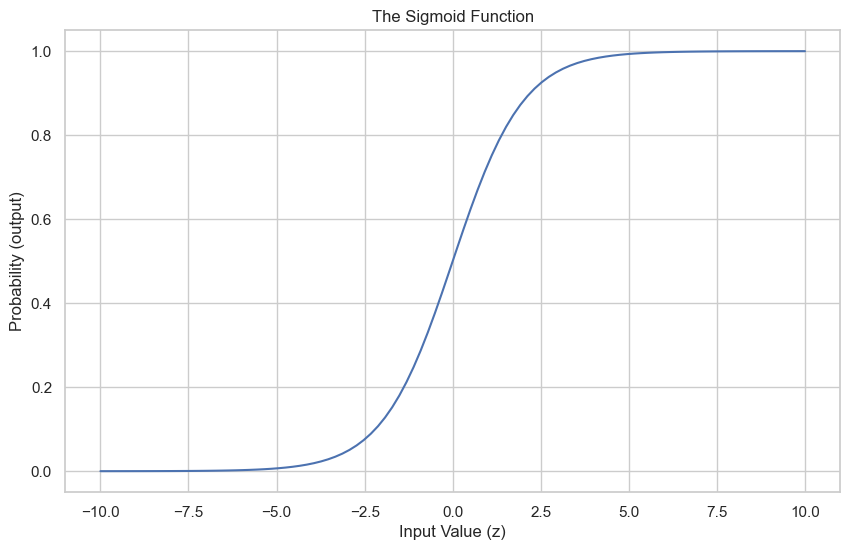

The sigmoid function takes any real-valued number and squashes it into a range between 0 and 1, which is perfect for representing a probability.


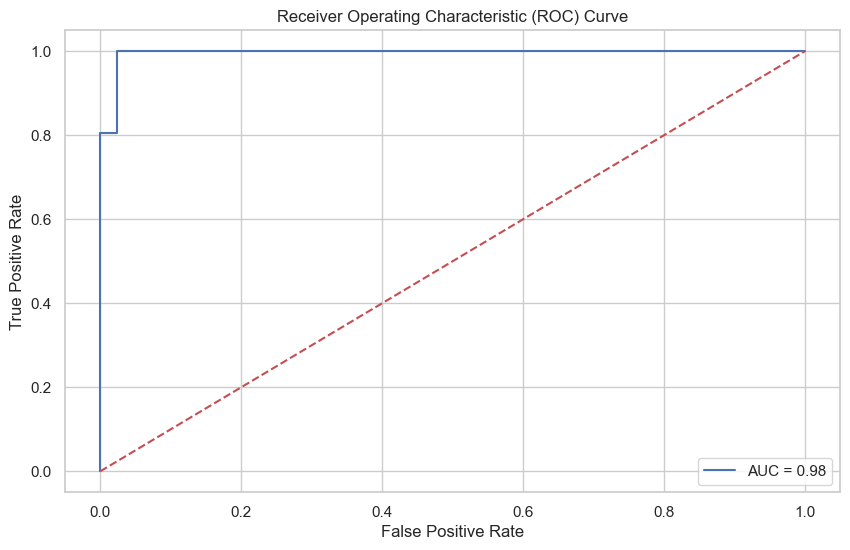

The ROC curve helps us visualize the trade-off between the true positive rate and false positive rate at various threshold settings.
The 'best' threshold depends on the specific problem (e.g., is it worse to miss a cancer case or to have a false alarm?).


In [6]:
# --- Explain the Sigmoid Function ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y_sig = sigmoid(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_sig)
plt.title("The Sigmoid Function")
plt.xlabel("Input Value (z)")
plt.ylabel("Probability (output)")
plt.grid(True)
plt.show()

print("The sigmoid function takes any real-valued number and squashes it into a range between 0 and 1, which is perfect for representing a probability.")

# --- Tune the Threshold ---
# Get prediction probabilities for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Plot the ROC Curve to find a good threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("The ROC curve helps us visualize the trade-off between the true positive rate and false positive rate at various threshold settings.")
print("The 'best' threshold depends on the specific problem (e.g., is it worse to miss a cancer case or to have a false alarm?).")